# Introduction To Personal Health Informatics
#### **Authors:** Sneha Jaikumar and Theodore Wang


![](https://raw.githubusercontent.com/CarolinaDataScience/Workshops2021/main/Personal%20Health%20Informatics/personal-health-informatics-fb.png)




### What is Personal Health Informatics?

Personal Health Informatics combines human-computer interaction and pattern recognition with ideas from behavioral science and social psychology, with the end goal of increasing the usability of health technology, improving access to health services, and creating new user-interfaces to help individuals stay physically/emotionally healthy. 


### How is PHI Data Collected?

A device (smartphone, fitbit, smartwatch) is used by the user to track an activity. Then, ubiquitous sensing and statistical pattern recognition is perfromed on the collected data. The resulting information can be used to develop preventative, interactive health tools.



#### **Step 1:** Import libraries

In [3]:
!pip install datascience

     |████████████████████████████████| 721 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 51.4 MB/s eta 0:00:01


  Created wheel for datascience: filename=datascience-0.17.0-py3-none-any.whl size=726851 sha256=b4005717df32efc7c181436a353c7468184f318f325871adaad4a17a9416e497
  Stored in directory: /Users/jonathanschlosser/Library/Caches/pip/wheels/9e/4a/ff/8e6d811fde4e6317745d7b7da087a381a2c2ebb882f69d4f39
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=a5a8d5a0fcb2e7fac3a5ae188ca62e88447f1d2cea9945218a78f3e842173175
  Stored in directory: /Users/jonathanschlosser/Library/Caches/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built datascience docopt


In [4]:
from typing import List
from csv import writer
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### **Step 2:** Find an open source accelerometer dataset


**Accelerometer Data**


*   Raw data that records changes in motion relative to the device in three directions
*   Consists of timestamped x,y,z values, commonly in a .txt file
*   Can be fed into machine learning algorithms to help detect [physical activities](https://www.nytimes.com/interactive/projects/well/2014/03/accelerometers.html), sedentary behaviors, and sleep.

*   Often requires training datasets that have annotated data (i.e., the raw data with the start/stop times of labels of behaviors)


Generally, open source accelerometer datasets are stored in a txt file are messy. It is useful to convert them into a CSV file and format them to follow a template, especially when these datasets need to be run through an ML algorithm

***Common elements to include:***

* A header
* Including additional commentary if a cell is either blank or information is not applicable

#### **Step 3:** Start Cleaning

In [ ]:
#Headers for our dataset
str_headers_list: List[str] = ["HEADER_USER_ID", "HEADER_ACTIVITY", "HEADER_TIMSESTAMP", "HEADER_X-ACCELERATION", "HEADER_Y-ACCELERATION", "HEADER_Z-ACCELERATION", "HEADER_SENSOR_DESCRIPTION","HEADER_PARTICIPANT_DESCRIPTION", "HEADER_SPECIAL_CONSIDERATIONS"]

#Creating a new csv file from our .txt dataset and appending our headers at the top
df1 = pd.read_csv('WISDM_ar_v1.1_raw.txt', error_bad_lines=False)
cols = len(df1.axes[1])
for index in range(cols,len(str_list)):
    df1[index] = "\"" + str_list[index].lower() + " is not provided\""
df1.to_csv('Accelerometer_Sensor.CSV', header=str_list, index= False)
pd.read_csv('Accelerometer_Sensor.CSV')

b'Skipping line 134634: expected 6 fields, saw 11\nSkipping line 197687: expected 6 fields, saw 11\n'
b'Skipping line 273261: expected 6 fields, saw 11\nSkipping line 371932: expected 6 fields, saw 11\n'
b'Skipping line 711484: expected 6 fields, saw 11\n'
b'Skipping line 832903: expected 6 fields, saw 7\nSkipping line 832904: expected 6 fields, saw 7\nSkipping line 832905: expected 6 fields, saw 7\nSkipping line 832906: expected 6 fields, saw 7\nSkipping line 832907: expected 6 fields, saw 7\nSkipping line 832908: expected 6 fields, saw 7\nSkipping line 832909: expected 6 fields, saw 7\nSkipping line 832910: expected 6 fields, saw 7\nSkipping line 832911: expected 6 fields, saw 7\nSkipping line 832912: expected 6 fields, saw 7\nSkipping line 832913: expected 6 fields, saw 7\nSkipping line 832914: expected 6 fields, saw 7\nSkipping line 832915: expected 6 fields, saw 7\nSkipping line 832916: expected 6 fields, saw 7\nSkipping line 832917: expected 6 fields, saw 7\nSkipping line 832918:

,HEADER_USER_ID,HEADER_ACTIVITY,HEADER_TIMSESTAMP,HEADER_X-ACCELERATION,HEADER_Y-ACCELERATION,HEADER_Z-ACCELERATION,HEADER_SENSOR_DESCRIPTION,HEADER_PARTICIPANT_DESCRIPTION,HEADER_SPECIAL_CONSIDERATIONS
0,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
1,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
2,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
3,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
4,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
...,...,...,...,...,...,...,...,...,...
1086460,19,Sitting,131623331483000,9.000000,-1.570000,1.69;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
1086461,19,Sitting,131623371431000,9.040000,-1.460000,1.73;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
1086462,19,Sitting,131623411592000,9.080000,-1.380000,1.69;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
1086463,19,Sitting,131623491487000,9.000000,-1.460000,1.73;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""


This dataset is over 1 million rows long! We'll be working with the first 150:

In [5]:
#Extract first 150 rows
df_150 = pd.read_csv('Accelerometer_Sensor.CSV').head(150)
df_150


FileNotFoundError: [Errno 2] No such file or directory: 'Accelerometer_Sensor.CSV'

#### **Step 4:** Prepare Data for Processing

Some things we have to address...
1. Everything is currently of type string, including the numbers
2. Header_Z-Acceleration Format (';')

In [ ]:
#Create a new table with properly formatted accelerations in the x, y, and z directions
accelerometer_table = Table.read_table('Accelerometer_Sensor.CSV')
x_axis_acc = make_array()
y_axis_acc = make_array()
z_axis_acc = make_array()
sensor_file_table
for num in np.arange(150):
  x_axis_acc = np.append(x_axis_acc, (float)(sensor_file_table.column(0).item(num).split(",")[3]))
  y_axis_acc= np.append(y_axis_acc, (float)(sensor_file_table.column(0).item(num).split(",")[4]))
  #Removes the ';'
  z_axis_acc= np.append(z_axis_acc, (float)(sensor_file_table.column(0).item(num).split(",")[5].replace(';','')))
axes = Table().with_columns('X-AXIS-ACCELERATION', x_axis_acc, 'Y-AXIS-ACCELERATION', y_axis_acc, 'Z-AXIS-ACCELERATION', z_axis_acc)
axes


X-AXIS-ACCELERATION,Y-AXIS-ACCELERATION,Z-AXIS-ACCELERATION
5.01229,11.264,0.953424
4.90332,10.8827,-0.0817221
-0.612916,18.4964,3.02372
-1.18497,12.1085,7.20516
1.37566,-2.49252,-6.51053
-0.612916,10.5694,5.70693
-0.503953,13.9472,7.05534
-8.43099,11.4139,5.13487
0.953424,1.37566,1.64806
-8.19945,19.5724,2.72407


In [ ]:
#Reformat our initial CSV file using the columns in our axes table
df_150 = df_150.drop(df_150.columns[[3, 4, 5]], axis=1)
df_150['X-AXIS-ACCELERATION'] = x_axis_acc
df_150['Y-AXIS-ACCELERATION'] = y_axis_acc
df_150['Z-AXIS-ACCELERATION'] = z_axis_acc
df_150.to_csv('Cleaned_Accelerometer_Sensor.CSV')
pd.read_csv('Cleaned_Accelerometer_Sensor.CSV')

,Unnamed: 0,HEADER_ACTIVITY,HEADER_TIMSESTAMP,HEADER_X-ACCELERATION,HEADER_Y-ACCELERATION,HEADER_Z-ACCELERATION,HEADER_SENSOR_DESCRIPTION,HEADER_PARTICIPANT_DESCRIPTION,HEADER_SPECIAL_CONSIDERATIONS
0,0,Jogging,49106062271000,5.012288,11.264028,0.95342433;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
1,1,Jogging,49106112167000,4.903325,10.882658,-0.08172209;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
2,2,Jogging,49106222305000,-0.612916,18.496431,3.0237172;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
3,3,Jogging,49106332290000,-1.184970,12.108489,7.205164;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
4,4,Jogging,49106442306000,1.375655,-2.492524,-6.510526;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
...,...,...,...,...,...,...,...,...,...
145,145,Jogging,49121462295000,-6.932757,13.334320,-6.3198414;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
146,146,Jogging,49121572311000,-4.140586,12.871228,-0.84446156;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
147,147,Jogging,49121682296000,3.023717,2.369940,2.0294318;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
148,148,Jogging,49121792312000,-1.988571,5.979332,0.040861044;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""


**We have cleaned our dataset!** Our next steps would be checking the dataset's documentation and filling out the description columns. But for now, let's look into the accelerations some more:

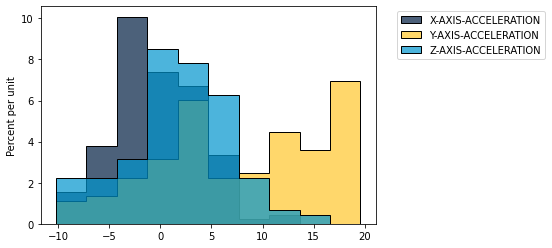

In [ ]:
axes.hist('X-AXIS-ACCELERATION', 'Y-AXIS-ACCELERATION','Z-AXIS-ACCELERATION',overlay = True)

**Some things to pay attention to:**
* Acceleration in y-direction is higher than in x or z directions
* Acceleration in x-direction looks to be on the lower end
*Lots of overlap between 0-5 m/s^2

##**That's it! Questions?**##